1. Use petrol_consumption dataset. Your task is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license. Build the regression model using Random Forest Regressor. Analyze the prediction ability of your model. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving petrol_consumption.csv to petrol_consumption.csv


In [ ]:
data = pd.read_csv('petrol_consumption.csv') 

In [ ]:
data.head(5) 

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 50.535999999999994
Mean Squared Error: 3764.6069200000006
Root Mean Squared Error: 61.3563926579782


In [ ]:
MSE_total =[]
Tree_Sayisi=[]

for m in range(1,201,10):
    Tree_Sayisi.append(m)
    
for i in range(1,201,10):
    rf = RandomForestRegressor(n_estimators = i , random_state = 42)
    rf.fit(X_train,y_train)
    y_pred_person = rf.predict(X_test)
    MSE_person = np.sqrt(metrics.mean_squared_error(y_test, y_pred_person))
    MSE_total.append(MSE_person)
    
    
MSE_liste = pd.DataFrame({"Tree " : Tree_Sayisi , "MSE " : MSE_total})

MSE_liste

,Tree Sayısı,MSE Oranları
0,1,98.533751
1,11,71.632828
2,21,67.080447
3,31,63.232904
4,41,61.321632
5,51,62.661943
6,61,62.597928
7,71,62.565465
8,81,61.128671
9,91,61.731958


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=MSE_liste["Tree "], y=MSE_liste['MSE'],
                    mode='lines+markers',
                    name='lines+markers'))
fig.show()

2. Use iris flower dataset to create classification model. Your task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris virginica. Create the classification model using Random Forest classifier and evaluate the performance of your classifier. Also you need to do the feature analysis and find out the important feature in iris dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris.csv


In [ ]:
import csv

with open('iris.csv') as inp, open('iris1.csv', 'w') as out:
    reader = csv.reader(inp)
    writer = csv.writer(out, delimiter=',')
    #No need to use `insert(), `append()` simply use `+` to concatenate two lists.
    writer.writerow(['ID'] + next(reader))
    #Iterate over enumerate object of reader and pass the starting index as 1.
    writer.writerows([i] + row for i, row in enumerate(reader, 2))

In [ ]:
knn = pd.read_csv("iris1.csv",names = ['Id','sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species'])

In [ ]:
knn['Id'] = knn['Id'].replace(['ID'],'1')

In [ ]:
knn.head()

,Id,sepal-length,sepal-width,petal-length,petal-width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X = knn.iloc[:, [1,2,3]].values
y = knn.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1361638095238093
Mean Squared Error: 0.036486272382463984
Root Mean Squared Error: 0.19101380154968903


In [ ]:
MSE_total =[]
Tree_Sayisi=[]

for m in range(1,201,10):
    Tree_Sayisi.append(m)
    
for i in range(1,201,10):
    rf = RandomForestRegressor(n_estimators = i , random_state = 42)
    rf.fit(X_train,y_train)
    y_pred_person = rf.predict(X_test)
    MSE_person = np.sqrt(metrics.mean_squared_error(y_test, y_pred_person))
    MSE_total.append(MSE_person)
    
    
MSE_liste = pd.DataFrame({"Tree" : Tree_Sayisi , "MSE" : MSE_total})

MSE_liste

,Tree,MSE
0,1,0.214476
1,11,0.190215
2,21,0.196337
3,31,0.198785
4,41,0.199401
5,51,0.195801
6,61,0.193100
7,71,0.193486
8,81,0.190006
9,91,0.191256


In [ ]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.9203290981045616


3. Use the make_classification() function to create a synthetic binary classification problem with  1,000 examples and 20 input features. Use this synthetic dataset to build a classification model  using Random forest classifier. Evaluate your model using stratified cross fold validation.  

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

In [ ]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),

In [ ]:
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 3


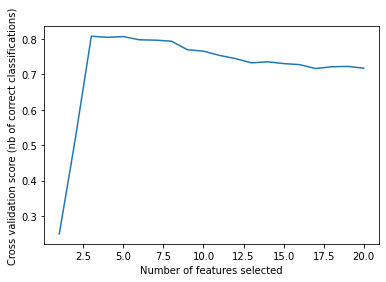

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=3, n_redundant=0,
    n_repeated=0, n_classes=2, random_state=0, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

In [ ]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

4. Use the make_regression() function to create a synthetic binary classification problem with  1,000 examples and 20 input features. Use this synthetic dataset to build a classification model  using Random forest regressor. Evaluate your model using stratified cross fold validation.  

In [ ]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.901 (0.028)


In [ ]:

# make predictions using random forest for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [ ]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.071 (8.308)


In [ ]:
# random forest for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -162


>0.1 0.856 (0.029)
>0.2 0.876 (0.026)
>0.3 0.881 (0.027)
>0.4 0.887 (0.019)
>0.5 0.894 (0.029)
>0.6 0.895 (0.030)
>0.7 0.899 (0.025)
>0.8 0.899 (0.024)
>0.9 0.902 (0.026)
>1.0 0.904 (0.026)


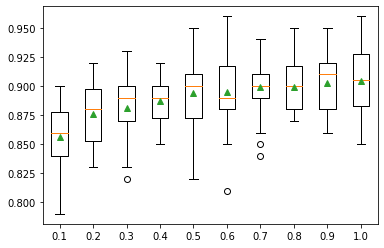

In [ ]:

# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()



5. Use diabetes dataset. The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. Use random forest ensemble method to build the classification model. Evaluate your model performance. Use “gridsearchcv( )” to find the best value of decision trees for creating forest.  

In [ ]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import binarize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [ ]:
#LOADING THE DATASET
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
dataset.rename(columns = {'6': 'Pregnancies','148':'Glucose', '72':'BloodPressure','35':'SkinThickness', '0':'Insulin','33.6':'BMI'
                       ,'0.627':'DiabetesPedigreeFunction','50': 'Age','1':'Outcome'}, inplace = True) 

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data = dataset.iloc[:,0:8]
outcome = dataset.iloc[:,8]
x,y = data,outcome

In [ ]:
#DISTRIBUTION OF DATASET INTO TRAINING AND TESTING SETS
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
#COUNTING THE POSITIVE AND NEGATIVE VALUES
print(y_test.value_counts())
#MEAN OF THE TESTING DISTRIBUTION
print(1- y_test.mean())

0    131
1     61
Name: Outcome, dtype: int64
0.6822916666666667


In [ ]:
#PARAMETER EVALUATION WITH GSC VALIDATION
gbe = GradientBoostingClassifier(random_state=0)
parameters={
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.5}
0.8323333333333331


In [ ]:
#ADJUSTING DEVELOPMENT THRESHOLD
gbi = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,max_features=0.5,random_state=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
gbi.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#STORING THE PREDICTION
yprediction = gbi.predict_proba(x_test)[:,1]

Text(0, 0.5, 'Frequency')

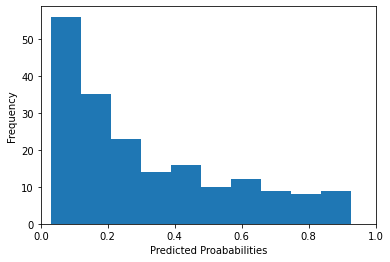

In [ ]:
#PLOTTING THE PREDICTIONS
plt.hist(yprediction,bins=10)
plt.xlim(0,1)
plt.xlabel("Predicted Proababilities")
plt.ylabel("Frequency")

In [ ]:
#CLASSIFIER SCORE Score of the Gradient Boosting Classifier
round(roc_auc_score(y_test,yprediction),5)

0.85684

In [ ]:
#USING RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train, y_train)
y_pred = rmfr.predict(x_test)
accuracyrf = round(accuracy_score(y_pred, y_test), 5)
accuracyrf

0.79688

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = round(accuracy_score(y_test, predictions),5)
accuracy

0.76562

6. Use breast cancer dataset. The dataset contains a total number of 10 features labeled in either benign or malignant classes. The features have 699 instances out of which 16 feature values are missing. The dataset only contains numeric values. Implement the ensemble method using Decision tree classifiers.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving breastCancer.csv to breastCancer.csv


In [ ]:
dataframe = pd.read_csv('breastCancer.csv')
dataframe.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
dataframe.drop(['id'],axis = 1, inplace = True)

In [ ]:
dataframe.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
dataframe.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clump_thickness    699 non-null    int64 
 1   size_uniformity    699 non-null    int64 
 2   shape_uniformity   699 non-null    int64 
 3   marginal_adhesion  699 non-null    int64 
 4   epithelial_size    699 non-null    int64 
 5   bare_nucleoli      699 non-null    object
 6   bland_chromatin    699 non-null    int64 
 7   normal_nucleoli    699 non-null    int64 
 8   mitoses            699 non-null    int64 
 9   class              699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
dataframe['bare_nucleoli'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [ ]:
dataframe.replace('?',0, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

values = dataframe.values

imputer = SimpleImputer()
imputedData = imputer.fit_transform(values)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [ ]:
X = normalizedData[:,0:9] 
Y = normalizedData[:,9] 

seed = 1

In [ ]:
num_trees_list = [x for x in range(5,100+1,5)]

In [ ]:
def print_graph(num_trees_list, means):
    plt.plot(num_trees_list, means)
    plt.xlabel('Number of trees')
    plt.ylabel('Media Cross-Validation')
    plt.show()

In [ ]:
def print_max_accuracy(num_trees_list, means):
    max_index = means.index(max(means))
    zipped_list = list(zip(num_trees_list, means))
    print(f"Number of trees: {zipped_list[max_index][0]} -> Accuracy CV: {zipped_list[max_index][1]}")

In [ ]:
# Bagged Decision Trees for Classification
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

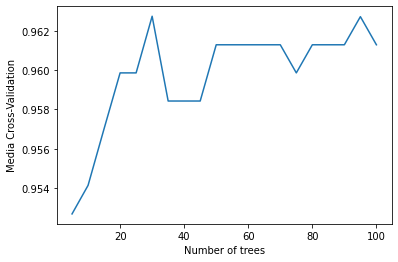

Number of trees: 30 -> Accuracy CV: 0.9627329192546583


In [ ]:

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)


cart = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)

means = []
for num_trees in num_trees_list:

    model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1)
    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    means.append(results.mean())
    
print_graph(num_trees_list, means)
print_max_accuracy(num_trees_list, means)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

cart = cart.fit(X_train, y_train)
y_train_pred = cart.predict(X_train)
y_test_pred = cart.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train = accuracy_score(y_train, y_train_pred) 
model_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f' % (model_train, model_test))

Decision tree train/test accuracies 1.000/0.907
Bagging train/test accuracies 1.000/0.936
